In [1]:
from langgraph.checkpoint.memory import MemorySaver
from langgraph.errors import NodeInterrupt
from langgraph.graph import START, END, StateGraph
from typing_extensions import TypedDict
from IPython.display import Image, display


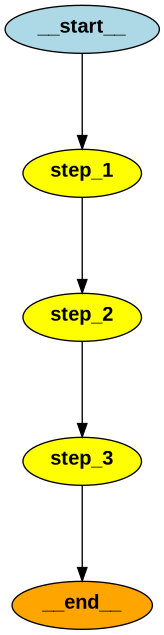

In [2]:
class State(TypedDict):
    input: str

def step_1(state: State) -> State:
    print("---Step 1---")
    return state

def step_2(state: State) -> State:
    if len(state['input']) > 5:
        raise NodeInterrupt(f"Received input that is longer than 5 characters: {state['input']}")
    print("---Step 2---")
    return state

def step_3(state: State) -> State:
    print("---Step 3---")
    return state

builder = StateGraph(State)

builder.add_node("step_1", step_1)
builder.add_node("step_2", step_2)
builder.add_node("step_3", step_3)

builder.add_edge(START, "step_1")
builder.add_edge("step_1", "step_2")
builder.add_edge("step_2", "step_3")
builder.add_edge("step_3", END)

memory = MemorySaver()
graph = builder.compile(checkpointer=memory)
display(Image(graph.get_graph().draw_png()))

In [3]:
initial_input = {"input": "hello world"}
config = {"configurable": {"thread_id": "1"}}

for event in graph.stream(initial_input, config, stream_mode="values"):
    print(event)

{'input': 'hello world'}
---Step 1---
{'input': 'hello world'}


In [4]:
state = graph.get_state(config)
print(state.next)

('step_2',)


In [5]:
print(state.tasks)

(PregelTask(id='d67afd4a-71db-1032-9fc4-861a1848dd5a', name='step_2', path=('__pregel_pull', 'step_2'), error=None, interrupts=(Interrupt(value='Received input that is longer than 5 characters: hello world', resumable=False, ns=None),), state=None, result=None),)


In [6]:
for event in graph.stream(None, config, stream_mode="values"):
    print(event)

{'input': 'hello world'}


In [7]:
state = graph.get_state(config)
print(state.next)

('step_2',)


In [8]:
graph.update_state(config, {"input": "hi"})

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f05d992-9b32-6135-8002-010a0efff9fb'}}

In [9]:
for event in graph.stream(None, config, stream_mode="values"):
    print(event)

{'input': 'hi'}
---Step 2---
{'input': 'hi'}
---Step 3---
{'input': 'hi'}
